# Optimizing and Improving the News Classification based SVM Model:

- Perform More Feature Engineering.
- Include the Hyperparameters Tuning methodology.
- Dataset : [News Classification Datasets 🔗](https://www.kaggle.com/datasets/rmisra/news-category-dataset)

### Import & Load:

In [1]:
import os, warnings
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_json('./dataset/News_Category_Dataset_v3.json', lines=True)
df.head(2)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23


### Data Analysis: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [4]:
# Available News Categories
categories = df['category'].unique()
print(f"""News Categories/Classes:
{categories}""")

News Categories/Classes:
['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


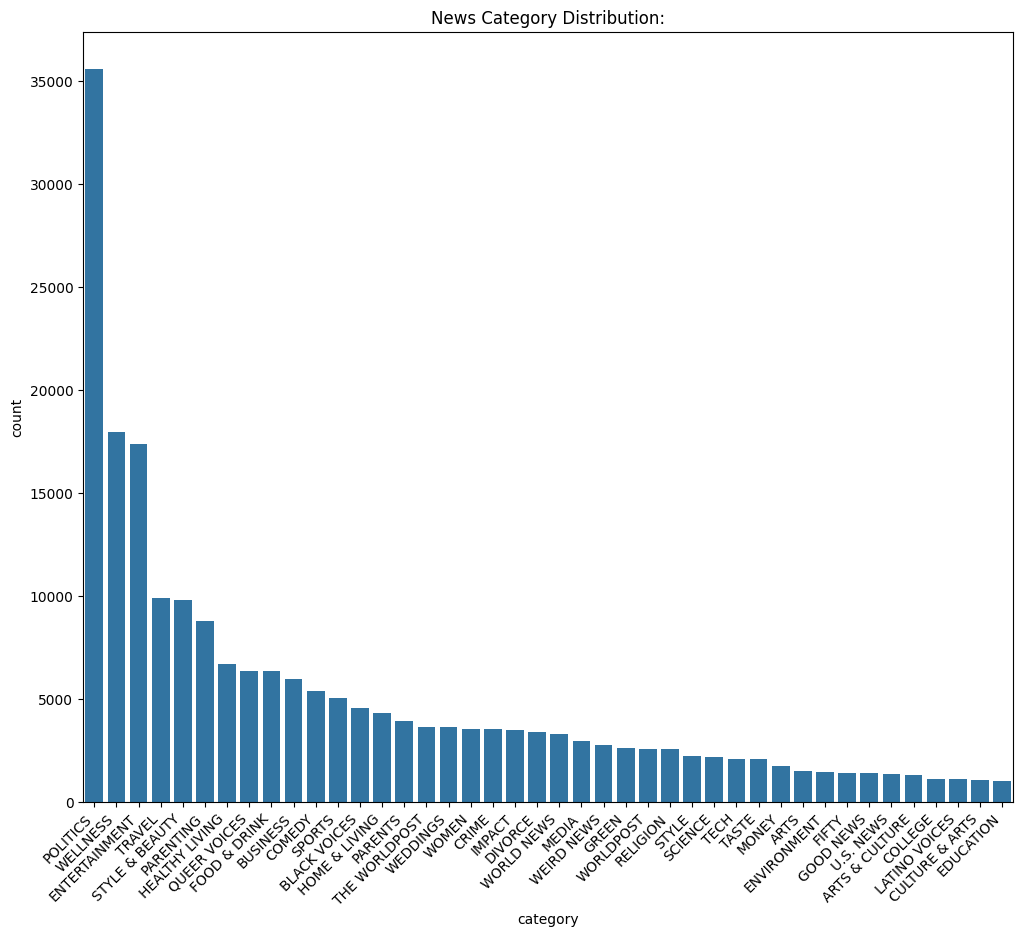

In [5]:
# Category-wise data imbalance check:
categories_count = df['category'].value_counts().reset_index()
plt.figure(figsize=(12,10))
sns.barplot(df['category'].value_counts(), orient='v')
plt.title('News Category Distribution:')
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
# Any one sample
i = np.random.randint(1,80000)
print(f"""
CATEGORY: {df.loc[i]['category']}
HEADLINE: {df.loc[i]['headline']}
DESC.: {df.loc[i]['short_description']}
""")


CATEGORY: PARENTS
HEADLINE: Parents Are Loving This Touching Letter Written From A Newborn's Perspective
DESC.: “Please don’t expect too much from me as a newborn baby, or too much from yourselves as parents."



---

### Feature Engineering:

In [7]:
df.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [8]:
categories

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

combining the target categories:

- Merging few categories that are similar to reduce the number of target classes and avoid feature similarities and also can fix the data imbalance automatically upto certain extent.

In [9]:
# Mapping for similar categories
merge_mapping = {
    'ARTS': 'ARTS_COMBINED',
    'ARTS & CULTURE': 'ARTS_COMBINED',
    'CULTURE & ARTS': 'ARTS_COMBINED',
    'PARENTING': 'PARENTING_COMBINED',
    'PARENTS': 'PARENTING_COMBINED',
    'WORLDPOST': 'WORLD_NEWS_COMBINED',
    'THE WORLDPOST': 'WORLD_NEWS_COMBINED',
    'WORLD NEWS': 'WORLD_NEWS_COMBINED',
    'FIFTY' : 'WORLD_NEWS_COMBINED',
    'U.S. NEWS' : 'WORLD_NEWS_COMBINED',
    'STYLE': 'STYLE_COMBINED',
    'STYLE & BEAUTY': 'STYLE_COMBINED',
    'WELLNESS': 'WELLNESS_COMBINED',
    'HEALTHY LIVING': 'WELLNESS_COMBINED',
    'GREEN': 'ENVIRONMENT_COMBINED',
    'ENVIRONMENT': 'ENVIRONMENT_COMBINED',
    'FOOD & DRINK': 'FOOD_COMBINED',
    'TASTE': 'FOOD_COMBINED',
    'EDUCATION' : 'EDUCATION_COMBINED',
    'COLLEGE': 'EDUCATION_COMBINED',
    'WEDDINGS': 'GOOD NEWS',
    'LATINO VOICES' : 'VOICES_COMBINED',
    'QUEER VOICES' : 'VOICES_COMBINED',
    'BLACK VOICES' : 'VOICES_COMBINED',
    'MONEY' : 'BUSINESS',
    'TECH' : 'SCI_TECH',
    'SCIENCE' : 'SCI_TECH'
}

In [10]:
# Merging:
df['category_combined'] = df['category'].apply(lambda x: merge_mapping.get(x, x))

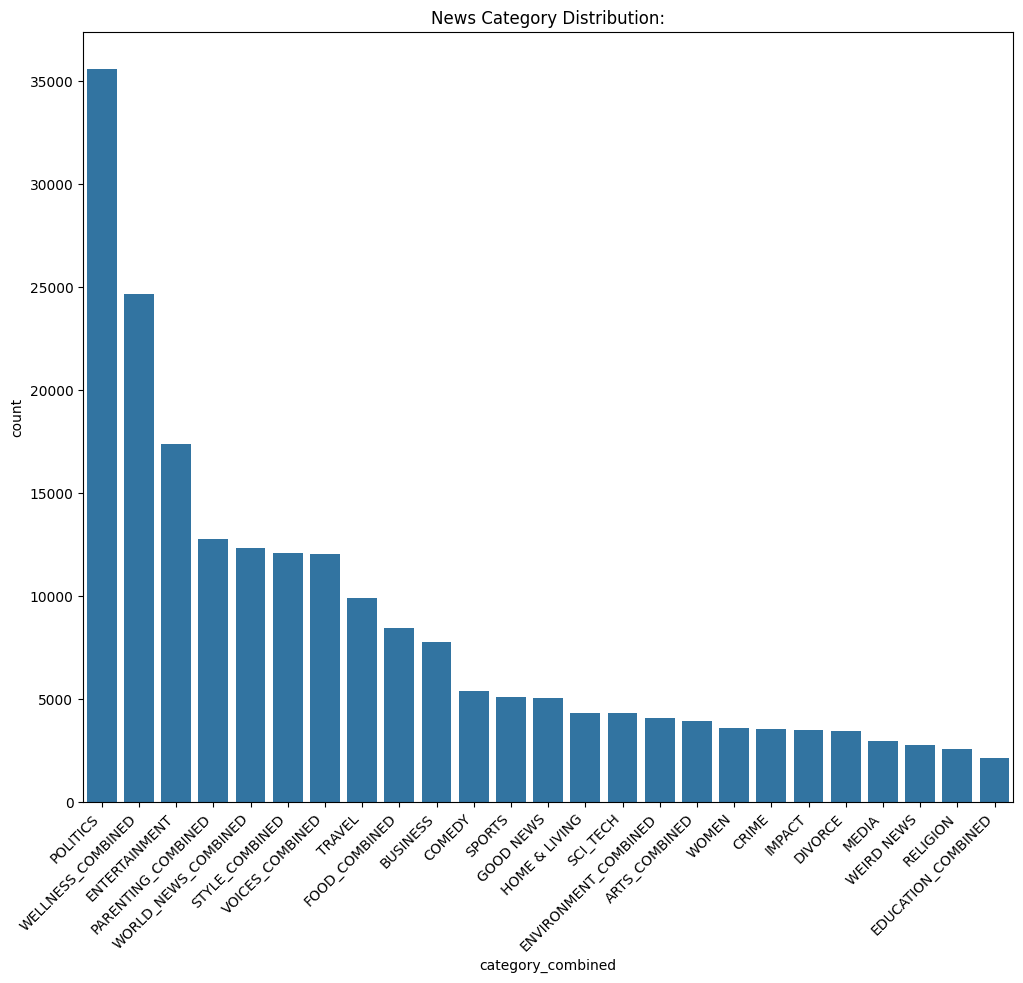

In [11]:
merged_categories_count = df['category_combined'].value_counts().reset_index()
plt.figure(figsize=(12,10))
sns.barplot(merged_categories_count, x='category_combined', y='count', orient='v')
plt.title('News Category Distribution:')
plt.xticks(rotation=45, ha='right')
plt.show()

Selecting only required columns:

In [12]:
req_cols = ['headline', 'short_description', 'category_combined']
data = df[req_cols]
data = data.rename(columns={'category_combined': 'category'})
data.head(3)

,headline,short_description,category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,WORLD_NEWS_COMBINED
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,WORLD_NEWS_COMBINED
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY


Combining headlines and short description columns:

In [13]:
data.loc[:, 'news'] = data['headline'].fillna('') + ' ' + data['short_description'].fillna('')
data = data[['news','category']]
print(data.loc[i]['news'])

Parents Are Loving This Touching Letter Written From A Newborn's Perspective “Please don’t expect too much from me as a newborn baby, or too much from yourselves as parents."


### News Data Preprocessing [Text Preprocessing]:

In [14]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

In [15]:
# nltk.download('all')

In [16]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess_text(text: str) -> str:
    
    text = text.lower().strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            # if stemmer.stem:
            if lemmatizer.lemmatize:
                # tokens.append(stemmer.stem(token))
                tokens.append(lemmatizer.lemmatize(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [18]:
# Sample Text:
preprocess_text(data.loc[i]['news'])

'parent loving touching letter written newborn\'s perspective “please don’t expect much newborn baby, much parents."'

In [19]:
data['preprocessed_news'] = data['news'].apply(lambda txt: preprocess_text(txt))

In [20]:
data.head(2)

,news,category,preprocessed_news
0,Over 4 Million Americans Roll Up Sleeves For O...,WORLD_NEWS_COMBINED,4 million american roll sleeve omicron-targete...
1,"American Airlines Flyer Charged, Banned For Li...",WORLD_NEWS_COMBINED,"american airline flyer charged, banned life pu..."


---

### Preprocessed News data vectorization & Label Encoding:

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [47]:
vectorizer = TfidfVectorizer(max_features=300, ngram_range=(1,2), stop_words='english',  max_df=0.95, min_df=5)
label_encoder = LabelEncoder()

In [61]:
X = vectorizer.fit_transform(data['preprocessed_news'])
y = label_encoder.fit_transform(data['category'])

---
### Splitting Train Test Data:

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"""
TRAIN DATA SHAPE: {X_train.shape}
TEST DATA SHAPE: {X_test.shape}      
""")


TRAIN DATA SHAPE: (146668, 300)
TEST DATA SHAPE: (62859, 300)      



---
### Handling the Imbalances among the data:

In [64]:
# Setting up minority classes and majority classes threshold:

MINORITY_THRESHOLD = 2000
MAJORITY_THRESHOLD = 10000

In [65]:
train_data_categories, counts = np.unique(y_train, return_counts=True)
category_counts = {int(cls): int(count) for cls, count in zip(train_data_categories, counts)}

In [66]:
minority_classes = [cls for cls, count in category_counts.items() if count < MINORITY_THRESHOLD]
majority_classes = [cls for cls, count in category_counts.items() if count > MAJORITY_THRESHOLD]
minority_classes

[5, 15, 21]

category wise sampling strategy:

In [67]:
oversampling_strat:dict = {cls: MINORITY_THRESHOLD for cls in minority_classes}
undersampling_strat:dict = {cls: MAJORITY_THRESHOLD for cls in majority_classes}
oversampling_strat

{5: 2000, 15: 2000, 21: 2000}

sampling pipeline:

In [68]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

over = SMOTE(sampling_strategy=oversampling_strat, random_state=42, k_neighbors=5)
# under = RandomUnderSampler(sampling_strategy=undersampling_strat, random_state=42)

sampling_pipeline = Pipeline([
    # ('under', under),
    ('over',over)
])

In [69]:
# if minority_classes:
#     X_train_sampled, y_train_sampled = sampling_pipeline.fit_resample(X_train, y_train)
# else:
    # X_train_sampled, y_train_sampled = X_train, y_train
X_train_sampled, y_train_sampled = X_train, y_train

print(f"""
SAMPLED TRAIN DATA [Hybrid Sampling - over and under sampling both]
Features: {X_train_sampled.shape}
Categories: {y_train_sampled.shape}
""")


SAMPLED TRAIN DATA [Hybrid Sampling - over and under sampling both]
Features: (146668, 300)
Categories: (146668,)



---

## Grid Search CV: 

- Hyperparameter Tuning:

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [76]:
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)

In [77]:
param_grid : dict = {
    'C': [0.1, 1,10]
}

In [79]:
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid, 
    cv=5,
    # cv=5, #splitting strategy
    n_jobs=8,
    scoring='f1_micro'
)

In [80]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=42),
             n_jobs=8, param_grid={'C': [0.1, 1, 10]}, scoring='f1_micro')

In [81]:
res_df = pd.DataFrame(grid.cv_results_)

print(f"""{'-'*75}
Best Hyperparameters: {grid.best_params_}
Best CV Score: {grid.best_score_}
Tuning time: {round(res_df['mean_fit_time'].sum(), 2)} seconds
{'-'*75}""")

---------------------------------------------------------------------------
Best Hyperparameters: {'C': 1}
Best CV Score: 0.3736057065915588
Tuning time: 10247.72 seconds
---------------------------------------------------------------------------


In [82]:
res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4289.892185,26.222414,412.804693,2.465745,0.1,{'C': 0.1},0.370628,0.374241,0.367935,0.372038,0.373982,0.371765,0.002327,3
1,3207.791634,491.121799,312.301554,15.431713,1.0,{'C': 1},0.370969,0.375571,0.372503,0.373572,0.375413,0.373606,0.001749,1
2,2750.032745,135.943709,186.906347,19.218070,10.0,{'C': 10},0.370151,0.375332,0.372060,0.373436,0.374425,0.373081,0.001824,2


---
## Choosing best model and Evaluation:

In [83]:
model = grid.best_estimator_

In [84]:
y_pred = model.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [86]:
print(f"""
Accuracy Score: {round(accuracy_score(y_test, y_pred), 2)}
{'-'*75}
Classification Report:
{classification_report(y_test, y_pred)}
""")


Accuracy Score: 0.37
---------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.28      0.22      1135
           1       0.27      0.29      0.28      2330
           2       0.15      0.25      0.19      1620
           3       0.21      0.45      0.29      1094
           4       0.45      0.61      0.52      1013
           5       0.18      0.43      0.25       612
           6       0.45      0.18      0.26      5148
           7       0.21      0.29      0.24      1223
           8       0.36      0.46      0.41      2515
           9       0.55      0.50      0.52      1506
          10       0.32      0.54      0.40      1292
          11       0.10      0.20      0.13      1038
          12       0.17      0.36      0.23       880
          13       0.56      0.59      0.57      3873
          14       0.78      0.45      0.58     10653
          15  

In [87]:
cm = confusion_matrix(y_test, y_pred)

# plt.figure()
# sns.heatmap(cm)
# plt.title('Confusion Matrix')
# plt.show()

---
### Dumping Trained Model:

In [88]:
model_filename = f"svm_acc{int(accuracy_score(y_test, y_pred)*100)}_{int(X_train.shape[1])}.pkl"

from pickle4 import pickle

with open(os.path.join('dumps', model_filename), 'wb') as file:
    pickle.dump(model, file)

---
### Extras:

In [95]:

from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
lr_model.fit(X_train_sampled, y_train_sampled)

LogisticRegression()

In [96]:
y_pred = lr_model.predict(X_test)

In [97]:
accuracy_score(y_test, y_pred)

0.45132757441257415

In [98]:
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()

In [99]:
mnb.fit(X_train_sampled, y_train_sampled)

MultinomialNB()

In [100]:
y_pred = mnb.predict(X_test)

In [102]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.42606468445250484
              precision    recall  f1-score   support

           0       0.52      0.13      0.21      1135
           1       0.47      0.15      0.22      2330
           2       0.51      0.02      0.04      1620
           3       0.41      0.21      0.28      1094
           4       0.88      0.41      0.56      1013
           5       0.33      0.13      0.19       612
           6       0.31      0.37      0.34      5148
           7       0.40      0.09      0.15      1223
           8       0.56      0.32      0.41      2515
           9       0.72      0.38      0.50      1506
          10       0.64      0.24      0.35      1292
          11       0.17      0.00      0.00      1038
          12       0.50      0.03      0.05       880
          13       0.50      0.58      0.54      3873
          14       0.44      0.82      0.57     10653
          15       0.00      0.00      0.00       785
          16       0.41      0.02      0.05      12

---
By Kirtan Ghelani $@SculptSoft$